Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load boston dataset from sklearn:

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

Split data into 20% test and 80% train:

In [3]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train[0]

array([1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
       5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.49480e+02, 2.49100e+01])

Mean normalization:

In [5]:
from utils import mean_normalize
X_train, X_test = mean_normalize(X_train, X_test)

Add a column of ones left hand-side:

In [6]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

Compute cost:

In [7]:
def compute_cost(X, Y, theta):
    landa = 0.1
    m = len(Y)
    J = (1/(2*m)) * (sum((np.matmul(X, theta) - Y)**2) + landa*sum(theta[1: ]**2))
    return J

In [8]:
compute_cost(X_train, y_train, np.zeros(X_train.shape[1]))

303.2776980198021

In [ ]:
def gradientDescent(X, y, theta, alpha):
    j = []
    lamda = 0.001
    temp = [0 for _ in range(X.shape[1])]
    batchSize = 50
    batchCost = [0 for i in range(X.shape[1])]
    k = 0
    rounds = 0
    while True:
        rounds += 1
        
        if k % batchSize == 0:
            batchCost = [0 for i in range(X.shape[1])]
            temp[0] = theta[0] - alpha*(batchCost[0]+(sum(np.multiply((np.matmul(X, theta) - y),  X[:,0]))/X.shape[0]))
            for i in range(1, X.shape[1]):
                temp[i] = theta[i] - alpha*(batchCost[i]+(sum(np.multiply((np.matmul(X, theta) - y),  X[:,i])/X.shape[0] + lamda*theta[i]/X.shape[0])))
            theta = np.array(temp)
        else:
            batchCost[0] += sum(np.multiply((np.matmul(X, theta) - y),  X[:,0]))/X.shape[0]
            for i in range(1, X.shape[1]):
                batchCost[i] += sum(np.multiply((np.matmul(X, theta) - y),  X[:,i]))/X.shape[0] + lamda*theta[i]/X.shape[0]
        
        k += 1
        j.append(computeCost(X, y, theta))
        
        #if j.len() >= 2 and j[j.len()-1] - j[j.len()-2] < 0.000000001:
        if rounds > 1000:
            break
    return theta, j

In [9]:
def gradient_descent(X, Y, theta, alpha):
    landa = 0.1
    m = len(Y)
    J_history = []
    tmp = []
    batch_size = 50
    batch_cost = np.zeros(X.shape[1])
    rounds = 0

    while True:
        
        if rounds % batch_size == 0:
            
            
        tmp.append(theta[0] - alpha * (1/m) * sum(np.multiply(np.matmul(X, theta) - Y, X[:, 0])))
        for i in range(1, X.shape[1]):
            tmp.append(theta[i] - alpha * (1/m) * sum(np.multiply(np.matmul(X, theta) - Y, X[:, i])) + landa*theta[i] * 1/m)
        
        theta = np.array(tmp)
        tmp = []
        J_history.append(compute_cost(X, Y, theta))
        
        rounds += 1
        if J_history.__len__() > 2:
            if J_history[-1] - J_history[-2] < 0:
        # if k == 3000:
                break
        
    return J_history, theta

In [10]:
J_history, theta = gradient_descent(X_train, y_train, [0]*14, 0.01)

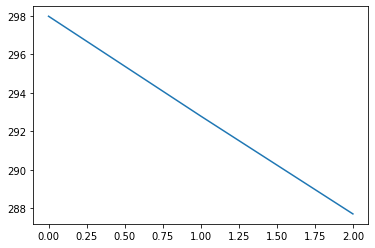

In [11]:
plt.plot(range(J_history.__len__()), J_history)

In [21]:
J_history[-1] - J_history[-2]

-0.000786678168550381

In [22]:
import math
math.isclose(J_history[-1], J_history[-2])

False